In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance


# Загрузка данных (предполагается, что файл 'titanic.csv' находится в текущей директории)
data = pd.read_csv('titanic.csv')

In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. Survived
Тип : Целевая переменная (таргет).
Значение : Показывает, выжил ли пассажир (1 — выжил, 0 — не выжил).
Значимость : Это наша целевая переменная, которую мы будем предсказывать с помощью модели машинного обучения.
2. Pclass
Тип : Категориальный признак.
Значение : Класс каюты пассажира:
1 — Первый класс (наиболее престижный).
2 — Второй класс.
3 — Третий класс (наименее престижный).
Значимость : Люди из более высоких классов имели большие шансы выжить, так как они находились ближе к спасательным плотам и имели доступ к помощи раньше.
3. Sex
Тип : Категориальный признак.
Значение : Пол пассажира:
male — Мужчина.
female — Женщина.
Значимость : Женщины имели значительно большие шансы выжить, так как следовали принципу "женщины и дети первыми". После one-hot кодирования этот признак преобразуется в числовые значения (Sex_male или Sex_female).
4. Age
Тип : Числовой признак.
Значение : Возраст пассажира в годах.
Значимость : Возраст также играл важную роль: дети и пожилые люди чаще получали приоритет при эвакуации. Этот признак был нормализован для улучшения работы модели.
5. SibSp
Тип : Числовой признак.
Значение : Количество братьев/сестер или супругов на борту.
Значимость : Люди, путешествующие с родственниками, могли иметь больше шансов выжить, так как они могли помогать друг другу. Однако слишком большое количество родственников могло усложнить эвакуацию.
6. Parch
Тип : Числовой признак.
Значение : Количество родителей/детей на борту.
Значимость : Аналогично SibSp, наличие детей или родителей могло повлиять на вероятность спасения.
7. Fare
Тип : Числовой признак.
Значение : Стоимость билета пассажира.
Значимость : Высокая цена билета может быть связана с более высоким классом каюты и, соответственно, лучшими условиями для спасения. Этот признак также был нормализован.
8. Embarked
Тип : Категориальный признак.
Значение : Порт посадки пассажира:
C — Cherbourg (Франция).
Q — Queenstown (Ирландия).
S — Southampton (Великобритания).
Значимость : Пассажиры из разных портов могли оказаться в разных частях корабля или иметь разные характеристики (например, класс каюты), что могло повлиять на их шансы выжить. После one-hot кодирования этот признак преобразуется в числовые значения (Embarked_C, Embarked_Q, Embarked_S).


In [30]:
# Оставляем только полезные столбцы
columns_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[columns_to_keep]

In [31]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [33]:
# Удаляем строки с пропущенными значениями
data = data.dropna()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [35]:
# One-hot кодирование категориальных признаков
categorical_features = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Нормализация числовых признаков
numeric_features = ["Pclass", 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [36]:
scaler.scale_

array([ 0.83626643, 14.4827517 ,  0.93003832,  0.85358139, 52.9014591 ])

In [37]:
scaler.mean_

array([ 2.24016854, 29.6420927 ,  0.51404494,  0.43258427, 34.5672514 ])

In [38]:
(34 - 29.6420927)/14.4827517

0.30090326688401353

In [39]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,True,False,True
1,1,-1.482983,0.577094,0.522511,-0.506787,0.694046,False,False,False
2,1,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,False,False,True
3,1,-1.482983,0.369951,0.522511,-0.506787,0.350326,False,False,True
4,0,0.908600,0.369951,-0.552714,-0.506787,-0.501257,True,False,True
...,...,...,...,...,...,...,...,...,...
885,0,0.908600,0.646142,-0.552714,5.350885,-0.102875,False,True,False
886,0,-0.287191,-0.182430,-0.552714,-0.506787,-0.407687,True,False,True
887,1,-1.482983,-0.734812,-0.552714,-0.506787,-0.086335,False,False,True
889,1,-1.482983,-0.251478,-0.552714,-0.506787,-0.086335,True,False,False


In [40]:
data.Survived.value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

---

In [41]:
# Разделение на признаки (X) и целевую переменную (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [46]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
44,0.908600,-0.734812,-0.552714,-0.506787,-0.504486,False,True,False
27,-1.482983,-0.734812,2.672960,1.836282,4.318080,True,False,True
72,-0.287191,-0.596716,-0.552714,-0.506787,0.735948,True,False,True
685,-0.287191,-0.320526,0.522511,1.836282,0.132547,True,False,False
370,-1.482983,-0.320526,0.522511,-0.506787,0.394591,True,False,False
...,...,...,...,...,...,...,...,...
192,0.908600,-0.734812,0.522511,-0.506787,-0.504959,False,False,True
268,-1.482983,1.958047,-0.552714,0.664747,2.247485,False,False,True
852,0.908600,-1.425288,0.522511,0.664747,-0.365235,False,False,False
735,0.908600,-0.078859,-0.552714,-0.506787,-0.349088,True,False,True


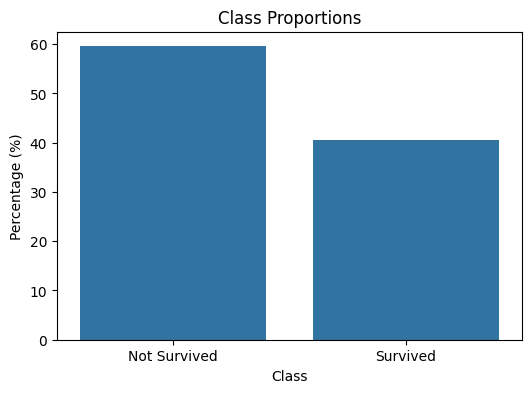

Размер обучающей выборки: (534, 8)
Размер тестовой выборки: (178, 8)


In [47]:
# Визуализация пропорций классов
class_proportions = y.value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_proportions.index, y=class_proportions.values * 100)
plt.title('Class Proportions')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

# Проверка результатов
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

In [48]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
44,0.908600,-0.734812,-0.552714,-0.506787,-0.504486,False,True,False
27,-1.482983,-0.734812,2.672960,1.836282,4.318080,True,False,True
72,-0.287191,-0.596716,-0.552714,-0.506787,0.735948,True,False,True
685,-0.287191,-0.320526,0.522511,1.836282,0.132547,True,False,False
370,-1.482983,-0.320526,0.522511,-0.506787,0.394591,True,False,False
...,...,...,...,...,...,...,...,...
192,0.908600,-0.734812,0.522511,-0.506787,-0.504959,False,False,True
268,-1.482983,1.958047,-0.552714,0.664747,2.247485,False,False,True
852,0.908600,-1.425288,0.522511,0.664747,-0.365235,False,False,False
735,0.908600,-0.078859,-0.552714,-0.506787,-0.349088,True,False,True


In [49]:
y_train

44     1
27     0
72     0
685    0
370    1
      ..
192    1
268    1
852    0
735    0
211    1
Name: Survived, Length: 534, dtype: int64

---

In [50]:
# 1. Decision Tree
tree_param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [5, 10, 15]}
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param_grid, cv=5)
tree_model.fit(X_train, y_train)
print("Decision Tree Best Params:", tree_model.best_params_)

# 2. Random Forest
rf_param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [3, 5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_model.fit(X_train, y_train)
print("Random Forest Best Params:", rf_model.best_params_)

# 3. K-Nearest Neighbors (KNN)
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_model.fit(X_train, y_train)
print("KNN Best Params:", knn_model.best_params_)

# 4. Support Vector Machine (SVM)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5)
svm_model.fit(X_train, y_train)
print("SVM Best Params:", svm_model.best_params_)

Decision Tree Best Params: {'max_depth': 10, 'min_samples_split': 10}
Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
KNN Best Params: {'n_neighbors': 7}
SVM Best Params: {'C': 10, 'kernel': 'rbf'}



--- Decision Tree ---


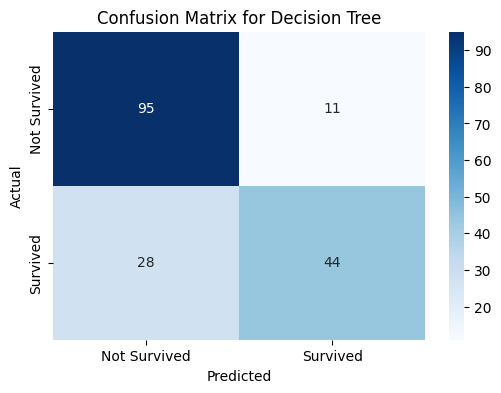

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.61      0.69        72

    accuracy                           0.78       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.78      0.78      0.77       178


Feature Importances:
      Feature  Importance
5    Sex_male    0.419948
1         Age    0.227507
0      Pclass    0.188684
4        Fare    0.093622
2       SibSp    0.055059
3       Parch    0.011131
7  Embarked_S    0.004048
6  Embarked_Q    0.000000

--- Random Forest ---


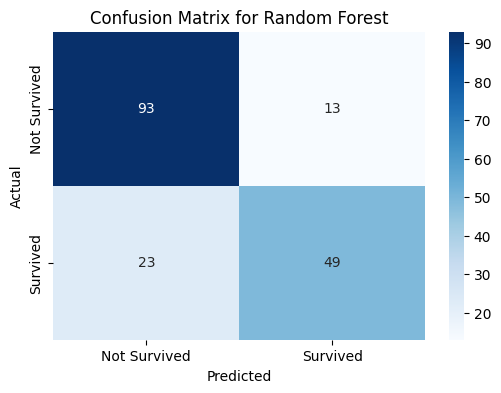

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.73        72

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.80      0.80      0.79       178


Feature Importances:
      Feature  Importance
5    Sex_male    0.340112
4        Fare    0.210280
1         Age    0.175048
0      Pclass    0.151778
2       SibSp    0.049490
3       Parch    0.045534
7  Embarked_S    0.022764
6  Embarked_Q    0.004993

--- KNN ---


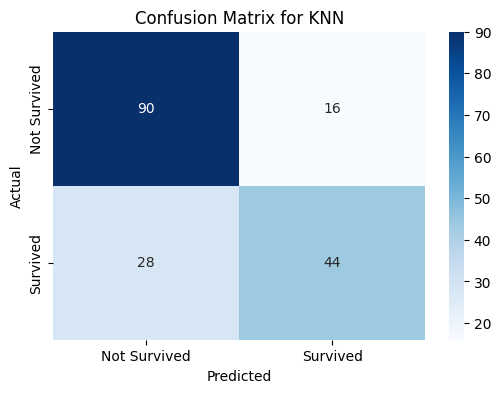

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       106
           1       0.73      0.61      0.67        72

    accuracy                           0.75       178
   macro avg       0.75      0.73      0.74       178
weighted avg       0.75      0.75      0.75       178


--- SVM ---


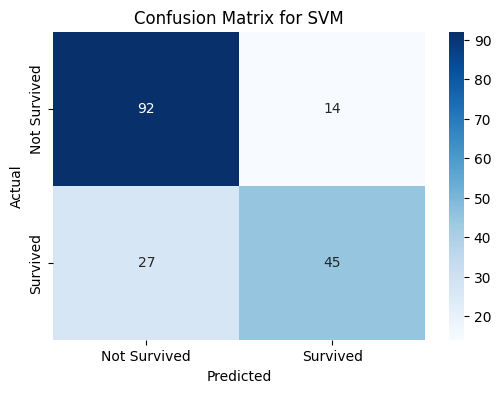

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       106
           1       0.76      0.62      0.69        72

    accuracy                           0.77       178
   macro avg       0.77      0.75      0.75       178
weighted avg       0.77      0.77      0.76       178



In [51]:
# Функция для оценки модели
def evaluate_model(model, name):
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test)
    
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Отчет классификации
    print(classification_report(y_test, y_pred))
    
    # Важность признаков (только для деревьев)
    if hasattr(model, "best_estimator_") and hasattr(model.best_estimator_, "feature_importances_"):
        feature_importances = model.best_estimator_.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("\nFeature Importances:")
        print(importance_df)

# Оценка моделей
evaluate_model(tree_model, "Decision Tree")
evaluate_model(rf_model, "Random Forest")
evaluate_model(knn_model, "KNN")
evaluate_model(svm_model, "SVM")

In [52]:
import pickle

# Сохранение модели в файл
model_filename = "random_forest_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)
print(f"Модель сохранена в файл: {model_filename}")

Модель сохранена в файл: random_forest_model.pkl
